# Introduction

# Methodology

# Code

## Libraries  
Import libraries

In [ ]:
# Import libraries

import re                               # Regular Expressions
import time                             # Time Function Execution
import datetime as dt                   # Datetime utilities
import pandas   as pd                   # Dataframe Manipulation
import numpy    as np                   # Matrix Manipulation
import seaborn  as sns                  # Visualization and Plotting

In [ ]:
from sklearn import preprocessing       # Normalization and Data Transformations
from sklearn import feature_selection   # Feature Selection
from sklearn import feature_extraction  # Feature Extraction
from sklearn import model_selection     # Train-testing Split
from sklearn import utils               # Verification and Safe operations

In [ ]:
from pydrive.auth        import GoogleAuth           # Use Google Auth
from pydrive.drive       import GoogleDrive          # Mount Google's drive
from google.colab        import auth                 # Use Google Auth in Colab
from oauth2client.client import GoogleCredentials    # Api to load google credentials

## Libraries Configuration  
Adjust settings from differents libraries

In [ ]:
# Configurations
# Set sns to default theme
sns.set_theme()

## Load Data  
First load the csv into /content/ directory.  
Run the code above and agree to allow colab to get access to the folder /content/  


In [ ]:
# Create an api session with Google Drive
auth.authenticate_user()
gauth             = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive             = GoogleDrive(gauth)

Change the string in var filepath to set where the path resides.

In [ ]:
filepath = "/content/Copia de datosMDF_US.csv"
# Team's Drive (use only if personal drive is mounted in directory)
# filepath = "/content/drive/MyDrive/EQUIPO NLP/RETO/Copia de Copia de datosMDF_US.csv"

Load Data:
- Set corresponding data type for each column.
- Use first row in csv as column's name.
- Leave rows with no data.

In [ ]:
# Load Dataset
start_time = time.time()  # Measure function time execution
dtypes     = {"cm_id":'category', "claim_id":'category',"pl":'category',"productmodel":'string',"partno":'string',"totalamount":'float32',"program_number":'category',"program_name":'string',"descr":'string',"actual_activity":'string',"reseller":'string',"claim_status":'category',"business_type":'category',"activity_subtype":'category',"activity_subtype_id":'category'}
raw_df     = pd.read_csv(filepath, header=0, verbose=True, dtype=dtypes, skip_blank_lines=False)
end_time   = time.time()  # End time
print("The time of execution is :",(end_time-start_time) * 10**3, "ms")

Tokenization took: 15.65 ms
Type conversion took: 39.12 ms
Parser memory cleanup took: 0.02 ms
The time of execution is : 73.98080825805664 ms


### Set column type

In [ ]:
start_time = time.time()                                                            # Measure function time executio
raw_df["sdate"] = pd.to_datetime(raw_df["start_date"], errors="coerce", utc=True)   # Convert to Time Series. Return Date type
raw_df["edate"] = pd.to_datetime(raw_df["end_date"], errors="coerce", utc=True)     # Convert to Time Series. Return Date type
end_time   = time.time()  # End time
print("The time of execution is :",(end_time-start_time) * 10**3, "ms")

The time of execution is : 30.118465423583984 ms


In [ ]:
raw_df.dtypes

cm_id                             category
claim_id                          category
start_date                          object
end_date                            object
pl                                category
productmodel                        string
partno                              string
totalamount                        float32
program_number                    category
program_name                        string
descr                               string
actual_activity                     string
reseller                            string
claim_status                      category
business_type                     category
activity_subtype                  category
activity_subtype_id               category
sdate                  datetime64[ns, UTC]
edate                  datetime64[ns, UTC]
dtype: object

## Data Description

In [ ]:
raw_df.describe()

,totalamount
count,8.102000e+03
mean,5.240541e+04
std,2.114458e+05
min,-1.654520e+03
25%,7.983125e+02
50%,5.605000e+03
75%,3.000000e+04
max,6.000000e+06


### Questions
Why is in _totalamount_ negative values?  


### Visualization

In [ ]:
raw_df.sort_values(by="totalamount").loc[:10,"totalamount"]

2691   -1654.520020
2490   -1329.640015
3380    -919.809998
5241    -640.309998
530     -615.020020
           ...     
1773      97.629997
7560      97.860001
1120      98.000000
8088      98.919998
10        99.000000
Name: totalamount, Length: 810, dtype: float32

<Axes: xlabel='totalamount'>

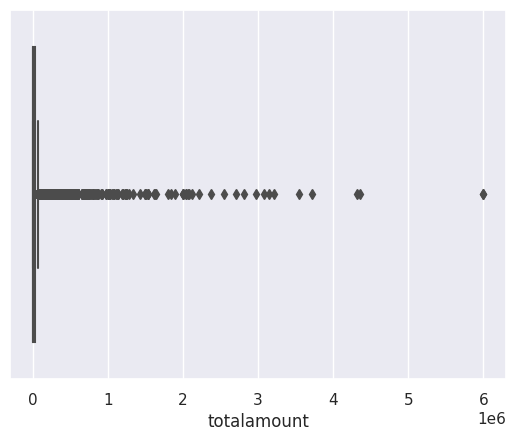

In [ ]:
sns.boxplot(data=raw_df, x="totalamount")

In [ ]:
# Sort Columns by date
raw_df = raw_df.sort_values(by="start_date")

## Visualization

In [ ]:
# Dataframe visualization
raw_df.tail(6)

## Cleaning
Identificar valores nulos

In [ ]:
raw_df.isnull().values.any()

True

In [ ]:
raw_df.isnull().sum()

cm_id                     0
claim_id                  0
start_date               65
end_date                 71
pl                       45
productmodel           3640
partno                 3671
totalamount               0
program_number           97
program_name             97
descr                    97
actual_activity          97
reseller                 97
claim_status             97
business_type            97
activity_subtype       1158
activity_subtype_id    1158
dtype: int64

Identificar las diversas categorías

In [ ]:
raw_df['activity_subtype'].unique()

array(['Program', 'UNKNOWN', 'Search', nan, 'Trad_media', 'Digital',
       'Holiday', 'BTS', 'BTB', 'Display', 'Email'], dtype=object)

In [ ]:
raw_df['activity_subtype'].value_counts()

UNKNOWN       3182
Program       2435
Search         344
Display        339
Holiday        247
Email          125
BTS            115
Digital         54
Trad_media      52
BTB             51
Name: activity_subtype, dtype: int64

In [5]:
import numpy as np

# Definir las matrices de ejemplo
matriz_A = np.array([[1, 2, 1],
                     [0, 1, 0],
                     [1, -1, 1]])
matriz_B = np.array([[0, -1, 1],
                     [2, 1, 1],
                     [1, 0, 1]])

# Calcular la distancia euclidiana entre las matrices
dist_euclidiana = np.linalg.norm(matriz_A - matriz_B)

dist_euclidiana

4.0

In [6]:
import numpy as np

# Definir las matrices de ejemplo
matriz_A = np.array([[1, 2, 1],
                     [0, 1, 0],
                     [1, -1, 1]])
matriz_B = np.array([[0, -1, 1],
                     [2, 1, 1],
                     [1, 0, 1]])



import numpy as np


# Convertir las matrices en vectores
vector_A = matriz_A.flatten()
vector_B = matriz_B.flatten()

# Calcular el ángulo entre los vectores
angulo_rad = np.arccos(np.dot(vector_A, vector_B) / (np.linalg.norm(vector_A) * np.linalg.norm(vector_B)))
angulo_deg = np.degrees(angulo_rad)

angulo_deg

78.46304096718453

In [ ]:
raw_df['activity_subtype_id'].unique()

array(['Advertising', 'UNKNOWN', 'Other', 'Search', nan, 'Circular',
       'Digital', 'Black_Friday', 'BTS', 'Sponsored_product', 'BTB',
       'Banner', 'Display', 'Holiday', 'Billboard', 'Endcap', 'Showcase',
       'Email', 'Social', 'Vendor', 'Amplification', 'Brand_building',
       'TIN', 'Print', 'Rewards', 'Choice', 'Landing_page', 'pla',
       'Launch', 'Prime'], dtype=object)

In [ ]:
raw_df['activity_subtype_id'].value_counts()

UNKNOWN              3182
Other                1459
Advertising           696
Display               224
Search                213
Holiday               183
Sponsored_product     130
Email                 125
BTS                   115
Banner                110
Showcase               73
Endcap                 68
Black_Friday           64
Digital                54
BTB                    51
Billboard              49
Circular               28
Vendor                 25
Print                  24
Rewards                16
Choice                 14
TIN                    13
Amplification          11
Brand_building          6
Social                  5
Landing_page            2
Prime                   2
pla                     1
Launch                  1
Name: activity_subtype_id, dtype: int64

<Axes: xlabel='activity_subtype', ylabel='count'>

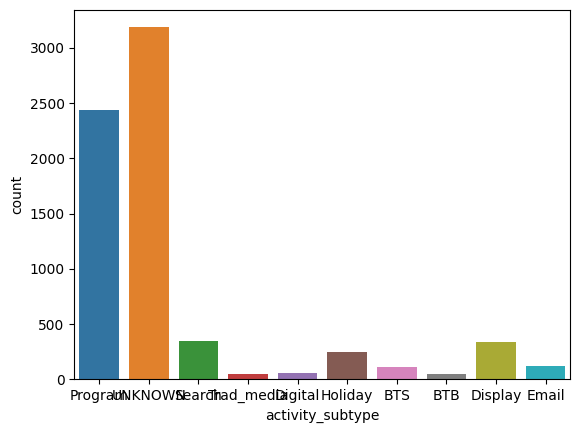

In [ ]:
sns.countplot(x=raw_df["activity_subtype"])

<Axes: xlabel='activity_subtype_id', ylabel='count'>

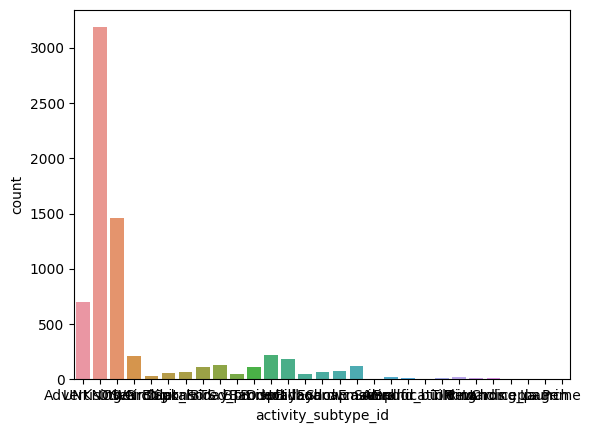

In [ ]:
sns.countplot(x=raw_df["activity_subtype_id"])

In [ ]:
# Reset index to make start at 0,1,2,...
raw_df = raw_df.reset_index()

In [ ]:
# Correct erroneous dates
raw_df.at[0,"sdate"] = pd.to_datetime("2022-01-31T00:00:00.000+0000")
raw_df.at[1,"sdate"] = pd.to_datetime("2020-04-26T00:00:00.000+0000")
raw_df.at[1,"edate"] = pd.to_datetime("2020-05-02T00:00:00.000+0000")
raw_df.at[2,"edate"] = pd.to_datetime("2020-09-19T00:00:00.000+0000")
raw_df.at[2,"sdate"] = pd.to_datetime("2020-09-13T00:00:00.000+0000")
raw_df.at[3,"sdate"] = pd.to_datetime("2021-06-26T00:00:00.000+0000")

In [ ]:
# Adjust sort and reset index
raw_df = raw_df.sort_values(by="sdate")
raw_df = raw_df.reset_index()

In [ ]:
raw_df.head(13)

,level_0,index,cm_id,claim_id,start_date,end_date,pl,productmodel,partno,totalamount,...,program_name,descr,actual_activity,reseller,claim_status,business_type,activity_subtype,activity_subtype_id,sdate,edate
0,4,6484,31360,11088,2017-12-16T00:00:00.000+0000,2017-12-20T00:00:00.000+0000,GP- (7CD00AA),<NA>,<NA>,80247.132812,...,Q118 HPS Toner Private Offer Rebate,SPECIAL NEGOTIATED DISCOUNT,IR program,Amazon,Approved,HPS Toner,Program,Other,2017-12-16 00:00:00+00:00,2017-12-20 00:00:00+00:00
1,5,3150,26021,8449,2017-12-20T00:00:00.000+0000,2017-12-20T00:00:00.000+0000,2N- (7CC42AA),DJ 3752 AiO,T8W51A,84752.203125,...,DeskJet 3752 BTB'18 Price Protection,SPECIAL NEGOTIATED DISCOUNT,Stock return avoidance,Wal-Mart,Approved,HPS HW,BTB,BTB,2017-12-20 00:00:00+00:00,2017-12-20 00:00:00+00:00
2,6,3356,23115,7733,2018-02-18T00:00:00.000+0000,2018-02-23T00:00:00.000+0000,K6- (7CD22AA),<NA>,<NA>,8239.059570,...,Q218 OPS Ink Private offer Rebate,SPECIAL NEGOTIATED DISCOUNT,IR program,Amazon,Reversed,OPS INK,Program,Other,2018-02-18 00:00:00+00:00,2018-02-23 00:00:00+00:00
3,7,6280,38590,14779,2018-03-11T00:00:00.000+0000,2018-03-17T00:00:00.000+0000,8A- (7CC63AA),Color LJ Pro M452nw,CF388A,100.000000,...,OPS - LJP M452-series IR - March,SPECIAL NEGOTIATED DISCOUNT,IR program,Amazon,Approved,OPS HW A4 & Scanners,UNKNOWN,UNKNOWN,2018-03-11 00:00:00+00:00,2018-03-17 00:00:00+00:00
4,8,2883,39662,15048,2018-04-08T00:00:00.000+0000,2018-04-21T00:00:00.000+0000,4H- (7CC47AA),OJ 4650 AiO,F1J03A,6750.000000,...,HPS - Envy 4650 EOL IR - 2 weeks,SPECIAL NEGOTIATED DISCOUNT,IR program,Amazon,Approved,HPS HW,UNKNOWN,UNKNOWN,2018-04-08 00:00:00+00:00,2018-04-21 00:00:00+00:00
5,9,5626,38858,14820,2018-05-01T00:00:00.000+0000,2018-05-05T00:00:00.000+0000,8A- (7CC63AA),LJ Pro M402n,C5F93A,12240.000000,...,OPS - LJP M402n & M426fdw rebate,SPECIAL NEGOTIATED DISCOUNT,IR program,Amazon,Approved,OPS HW A4 & Scanners,UNKNOWN,UNKNOWN,2018-05-01 00:00:00+00:00,2018-05-05 00:00:00+00:00
6,10,2054,39663,15049,2018-05-07T00:00:00.000+0000,2018-05-26T00:00:00.000+0000,4H- (7CC47AA),OJ 4650 AiO,F1J03A,10740.000000,...,HPS - OJ 4650 EOL IR - 3 weeks,SPECIAL NEGOTIATED DISCOUNT,IR program,Amazon,Approved,HPS HW,UNKNOWN,UNKNOWN,2018-05-07 00:00:00+00:00,2018-05-26 00:00:00+00:00
7,11,1091,24142,7996,2018-05-19T00:00:00.000+0000,2018-05-19T00:00:00.000+0000,4H- (7CC47AA),OJ 4652 AiO,F1J02A,7771.919922,...,EOL: ENVY 4512 & OJ 4652 Mark Down,EOL Program,End Of Life,Wal-Mart,Approved,HPS HW,UNKNOWN,UNKNOWN,2018-05-19 00:00:00+00:00,2018-05-19 00:00:00+00:00
8,12,654,39665,15051,2018-05-27T00:00:00.000+0000,2018-06-16T00:00:00.000+0000,4H- (7CC47AA),OJ 4650 AiO,F1J03A,5490.000000,...,HPS - OJ 4650 EOL IR - 3 weeks (May-June),SPECIAL NEGOTIATED DISCOUNT,IR program,Amazon,Approved,HPS HW,UNKNOWN,UNKNOWN,2018-05-27 00:00:00+00:00,2018-06-16 00:00:00+00:00
9,13,2239,24209,8021,2018-06-11T00:00:00.000+0000,2018-09-12T00:00:00.000+0000,4H- (7CC47AA),OJ 3830 AiO,K7V40A,180.000000,...,Edu Fall Rush 18' PC / Tablet + Printer,SPECIAL NEGOTIATED DISCOUNT,IR program,D&H,Approved,HPS HW,UNKNOWN,UNKNOWN,2018-06-11 00:00:00+00:00,2018-09-12 00:00:00+00:00


## Combine columns

In [ ]:
# Create column product_description
raw_df["product_description"] = str(raw_df["pl"]) + " " + raw_df["productmodel"] + " " + raw_df["partno"]

In [ ]:
# Column program_desciption
raw_df["program_description"] = str(raw_df["program_number"]) + " " + raw_df["program_name"] + " " + raw_df["descr"] + " " + raw_df["actual_activity"]

In [ ]:
# Column Context description
raw_df["context"] = raw_df["reseller"] + " " + raw_df["business_type"]

In [ ]:
raw_df["corpus"] = raw_df["product_description"] + " " + raw_df["program_description"] + " " + raw_df["context"]

In [ ]:
raw_df.head(10)

,level_0,index,cm_id,claim_id,start_date,end_date,pl,productmodel,partno,totalamount,...,claim_status,business_type,activity_subtype,activity_subtype_id,sdate,edate,product_description,program_description,context,corpus
0,4,6484,31360,11088,2017-12-16T00:00:00.000+0000,2017-12-20T00:00:00.000+0000,GP- (7CD00AA),<NA>,<NA>,80247.132812,...,Approved,HPS Toner,Program,Other,2017-12-16 00:00:00+00:00,2017-12-20 00:00:00+00:00,<NA>,0 5568 1 5693 2 6075 3 ...,Amazon HPS Toner,<NA>
1,5,3150,26021,8449,2017-12-20T00:00:00.000+0000,2017-12-20T00:00:00.000+0000,2N- (7CC42AA),DJ 3752 AiO,T8W51A,84752.203125,...,Approved,HPS HW,BTB,BTB,2017-12-20 00:00:00+00:00,2017-12-20 00:00:00+00:00,0 GP- (7CD00AA) 1 2N- (7CC42AA) 2 ...,0 5568 1 5693 2 6075 3 ...,Wal-Mart HPS HW,0 GP- (7CD00AA) 1 2N- (7CC42AA) 2 ...
2,6,3356,23115,7733,2018-02-18T00:00:00.000+0000,2018-02-23T00:00:00.000+0000,K6- (7CD22AA),<NA>,<NA>,8239.059570,...,Reversed,OPS INK,Program,Other,2018-02-18 00:00:00+00:00,2018-02-23 00:00:00+00:00,<NA>,0 5568 1 5693 2 6075 3 ...,Amazon OPS INK,<NA>
3,7,6280,38590,14779,2018-03-11T00:00:00.000+0000,2018-03-17T00:00:00.000+0000,8A- (7CC63AA),Color LJ Pro M452nw,CF388A,100.000000,...,Approved,OPS HW A4 & Scanners,UNKNOWN,UNKNOWN,2018-03-11 00:00:00+00:00,2018-03-17 00:00:00+00:00,0 GP- (7CD00AA) 1 2N- (7CC42AA) 2 ...,0 5568 1 5693 2 6075 3 ...,Amazon OPS HW A4 & Scanners,0 GP- (7CD00AA) 1 2N- (7CC42AA) 2 ...
4,8,2883,39662,15048,2018-04-08T00:00:00.000+0000,2018-04-21T00:00:00.000+0000,4H- (7CC47AA),OJ 4650 AiO,F1J03A,6750.000000,...,Approved,HPS HW,UNKNOWN,UNKNOWN,2018-04-08 00:00:00+00:00,2018-04-21 00:00:00+00:00,0 GP- (7CD00AA) 1 2N- (7CC42AA) 2 ...,0 5568 1 5693 2 6075 3 ...,Amazon HPS HW,0 GP- (7CD00AA) 1 2N- (7CC42AA) 2 ...
5,9,5626,38858,14820,2018-05-01T00:00:00.000+0000,2018-05-05T00:00:00.000+0000,8A- (7CC63AA),LJ Pro M402n,C5F93A,12240.000000,...,Approved,OPS HW A4 & Scanners,UNKNOWN,UNKNOWN,2018-05-01 00:00:00+00:00,2018-05-05 00:00:00+00:00,0 GP- (7CD00AA) 1 2N- (7CC42AA) 2 ...,0 5568 1 5693 2 6075 3 ...,Amazon OPS HW A4 & Scanners,0 GP- (7CD00AA) 1 2N- (7CC42AA) 2 ...
6,10,2054,39663,15049,2018-05-07T00:00:00.000+0000,2018-05-26T00:00:00.000+0000,4H- (7CC47AA),OJ 4650 AiO,F1J03A,10740.000000,...,Approved,HPS HW,UNKNOWN,UNKNOWN,2018-05-07 00:00:00+00:00,2018-05-26 00:00:00+00:00,0 GP- (7CD00AA) 1 2N- (7CC42AA) 2 ...,0 5568 1 5693 2 6075 3 ...,Amazon HPS HW,0 GP- (7CD00AA) 1 2N- (7CC42AA) 2 ...
7,11,1091,24142,7996,2018-05-19T00:00:00.000+0000,2018-05-19T00:00:00.000+0000,4H- (7CC47AA),OJ 4652 AiO,F1J02A,7771.919922,...,Approved,HPS HW,UNKNOWN,UNKNOWN,2018-05-19 00:00:00+00:00,2018-05-19 00:00:00+00:00,0 GP- (7CD00AA) 1 2N- (7CC42AA) 2 ...,0 5568 1 5693 2 6075 3 ...,Wal-Mart HPS HW,0 GP- (7CD00AA) 1 2N- (7CC42AA) 2 ...
8,12,654,39665,15051,2018-05-27T00:00:00.000+0000,2018-06-16T00:00:00.000+0000,4H- (7CC47AA),OJ 4650 AiO,F1J03A,5490.000000,...,Approved,HPS HW,UNKNOWN,UNKNOWN,2018-05-27 00:00:00+00:00,2018-06-16 00:00:00+00:00,0 GP- (7CD00AA) 1 2N- (7CC42AA) 2 ...,0 5568 1 5693 2 6075 3 ...,Amazon HPS HW,0 GP- (7CD00AA) 1 2N- (7CC42AA) 2 ...
9,13,2239,24209,8021,2018-06-11T00:00:00.000+0000,2018-09-12T00:00:00.000+0000,4H- (7CC47AA),OJ 3830 AiO,K7V40A,180.000000,...,Approved,HPS HW,UNKNOWN,UNKNOWN,2018-06-11 00:00:00+00:00,2018-09-12 00:00:00+00:00,0 GP- (7CD00AA) 1 2N- (7CC42AA) 2 ...,0 5568 1 5693 2 6075 3 ...,D&H HPS HW,0 GP- (7CD00AA) 1 2N- (7CC42AA) 2 ...


In [ ]:
raw_df["program_description"].tail(40)

8062                                                 <NA>
8063                                                 <NA>
8064                                                 <NA>
8065    0       5568
1       5693
2       6075
3      ...
8066                                                 <NA>
8067                                                 <NA>
8068                                                 <NA>
8069                                                 <NA>
8070                                                 <NA>
8071                                                 <NA>
8072    0       5568
1       5693
2       6075
3      ...
8073                                                 <NA>
8074                                                 <NA>
8075                                                 <NA>
8076    0       5568
1       5693
2       6075
3      ...
8077                                                 <NA>
8078                                                 <NA>
8079          